# Imports

In [ ]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# to use only one GPU.
# use this on r-001
# otherwise comment
import os
os.environ["CUDA_VISIBLE_DEVICES"]="7"


## Load Data

In [ ]:
import os
os.getcwd()


In [5]:
#
# parameters
#
#year = '2017'
year = '2018'

inputfile = 'C_Toronto-2018-final.log'
outputprefix = year +'-Toronto-'
dataset = pd.read_csv(inputfile)

In [7]:
dataset.completed_laps

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       1
25       1
26       0
27       0
28       0
29       0
        ..
5567    85
5568    84
5569    85
5570    84
5571    83
5572    82
5573    34
5574    85
5575    84
5576    85
5577    84
5578    85
5579    84
5580    84
5581    83
5582    85
5583    84
5584    85
5585    85
5586    84
5587    85
5588    84
5589    85
5590    84
5591    85
5592    84
5593    68
5594    83
5595    85
5596    84
Name: completed_laps, Length: 5597, dtype: int64

In [8]:
final_lap = max(dataset.completed_laps)

total_laps = final_lap + 1


# get records for the cars that finish the race
completed_car_numbers= dataset[dataset.completed_laps == final_lap].car_number.values

completed_car_count = len(completed_car_numbers)

print('count of completed cars:', completed_car_count)
print('completed cars:', completed_car_numbers)

#make a copy
alldata = dataset.copy()
dataset = dataset[dataset['car_number'].isin(completed_car_numbers)]

count of completed cars: 15
completed cars: [ 9 22  6  5 23 14 26 27  1 98 20 10 88 19  4]


In [9]:
dataset.sort_values(by=['car_number', 'completed_laps', 'elapsed_time'], ascending=True).head(40)

,rank,car_number,unique_id,completed_laps,elapsed_time,last_laptime,lap_status,best_laptime,best_lap,time_behind_leader,...,time_behind_prec,laps_behind_prec,overall_rank,overall_best_laptime,current_status,track_status,pit_stop_count,last_pitted_lap,start_position,laps_led
0,1,1,0,0,0.0000,111.3278,T,0.0000,0,0.0000,...,0.0000,0,1,0.0000,Active,G,0,0,1,0
24,1,1,0,1,63.6534,63.6534,T,63.6534,1,0.0000,...,0.0000,0,1,63.6534,Active,G,0,0,1,1
95,1,1,0,2,126.0809,62.4275,T,62.4275,2,0.0000,...,0.0000,0,1,62.4275,Active,G,0,0,1,2
154,1,1,0,3,187.5192,61.4383,T,61.4383,3,0.0000,...,0.0000,0,1,61.4383,Active,G,0,0,1,3
213,1,1,0,4,248.6149,61.0957,T,61.0957,4,0.0000,...,0.0000,0,1,61.0957,Active,G,0,0,1,4
273,1,1,0,5,309.6570,61.0421,T,61.0421,5,0.0000,...,0.0000,0,1,61.0421,Active,G,0,0,1,5
335,1,1,0,6,370.2867,60.6297,T,60.6297,6,0.0000,...,0.0000,0,1,60.6297,Active,G,0,0,1,6
396,1,1,0,7,431.3511,61.0644,T,60.6297,6,0.0000,...,0.0000,0,1,60.6297,Active,G,0,0,1,7
456,1,1,0,8,492.1462,60.7951,T,60.6297,6,0.0000,...,0.0000,0,1,60.6297,Active,G,0,0,1,8
518,1,1,0,9,552.7227,60.5765,T,60.5765,9,0.0000,...,0.0000,0,1,60.5765,Active,G,0,0,1,9


In [10]:
dataset.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3655 entries, 0 to 5595
Data columns (total 21 columns):
rank                    3655 non-null int64
car_number              3655 non-null int64
unique_id               3655 non-null object
completed_laps          3655 non-null int64
elapsed_time            3655 non-null float64
last_laptime            3655 non-null float64
lap_status              3655 non-null object
best_laptime            3655 non-null float64
best_lap                3655 non-null object
time_behind_leader      3655 non-null float64
laps_behind_leade       3655 non-null object
time_behind_prec        3655 non-null float64
laps_behind_prec        3655 non-null object
overall_rank            3655 non-null object
overall_best_laptime    3655 non-null float64
current_status          3655 non-null object
track_status            3655 non-null object
pit_stop_count          3655 non-null int64
last_pitted_lap         3655 non-null int64
start_position          3655 non-null

## Prepare data for RNN

In [11]:
#univariate dataset
uni_ds = dataset.drop(["unique_id", "best_lap", "current_status", "track_status", "lap_status",
                      "laps_behind_leade","laps_behind_prec","overall_rank","pit_stop_count",
                      "last_pitted_lap","start_position","laps_led"], axis=1)
uni_ds=uni_ds.sort_values(by=['car_number', 'completed_laps', 'elapsed_time'], ascending=True)
uni_ds=uni_ds.drop_duplicates(subset=['car_number', 'completed_laps'], keep='first')

# convert time to minutes
uni_ds.head(10)

,rank,car_number,completed_laps,elapsed_time,last_laptime,best_laptime,time_behind_leader,time_behind_prec,overall_best_laptime
0,1,1,0,0.0000,111.3278,0.0000,0.0,0.0,0.0000
24,1,1,1,63.6534,63.6534,63.6534,0.0,0.0,63.6534
95,1,1,2,126.0809,62.4275,62.4275,0.0,0.0,62.4275
154,1,1,3,187.5192,61.4383,61.4383,0.0,0.0,61.4383
213,1,1,4,248.6149,61.0957,61.0957,0.0,0.0,61.0957
273,1,1,5,309.6570,61.0421,61.0421,0.0,0.0,61.0421
335,1,1,6,370.2867,60.6297,60.6297,0.0,0.0,60.6297
396,1,1,7,431.3511,61.0644,60.6297,0.0,0.0,60.6297
456,1,1,8,492.1462,60.7951,60.6297,0.0,0.0,60.6297
518,1,1,9,552.7227,60.5765,60.5765,0.0,0.0,60.5765


In [12]:
carnumber = uni_ds.drop_duplicates(subset=['car_number'], keep='first')
carnumber

,rank,car_number,completed_laps,elapsed_time,last_laptime,best_laptime,time_behind_leader,time_behind_prec,overall_best_laptime
0,1,1,0,0.0000,111.3278,0.0,0.0000,0.0000,0.0
11,12,4,0,0.9026,99.0880,0.0,0.9026,0.0160,0.0
8,9,5,0,0.7617,102.4232,0.0,0.7617,0.1841,0.0
9,10,6,0,0.6901,100.2825,0.0,0.6901,0.0000,0.0
1,2,9,0,0.0216,110.1216,0.0,0.0216,0.0216,0.0
21,21,10,0,2.4250,91.8177,0.0,2.4250,0.2552,0.0
14,15,14,0,1.0353,96.2275,0.0,1.0353,0.0990,0.0
23,23,19,0,3.3146,90.8058,0.0,3.3146,0.4255,0.0
7,8,20,0,0.5776,103.1926,0.0,0.5776,0.0378,0.0
2,3,22,0,0.1650,108.5244,0.0,0.1650,0.1434,0.0


In [13]:
uni_ds.describe()

,rank,car_number,completed_laps,elapsed_time,last_laptime,best_laptime,time_behind_leader,time_behind_prec,overall_best_laptime
count,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000
mean,10.024031,24.800000,42.500000,2981.572777,69.187274,60.480861,16.866542,2.120099,60.480861
std,5.752879,28.006571,24.834011,1780.414867,15.390888,6.631084,13.438830,2.861129,6.631084
min,1.000000,1.000000,0.000000,0.000000,60.260000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,6.000000,21.000000,1319.032700,61.441000,60.735100,6.291475,0.617425,60.735100
50%,10.000000,19.000000,42.500000,3153.322250,61.915050,61.086000,14.497400,1.196850,61.086000
75%,14.000000,26.000000,64.000000,4558.186700,64.403000,61.402800,25.108350,2.336925,61.402800
max,23.000000,98.000000,85.000000,5879.384900,152.933100,71.990800,61.835900,32.597200,71.990800


In [14]:
uni_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1290 entries, 0 to 5584
Data columns (total 9 columns):
rank                    1290 non-null int64
car_number              1290 non-null int64
completed_laps          1290 non-null int64
elapsed_time            1290 non-null float64
last_laptime            1290 non-null float64
best_laptime            1290 non-null float64
time_behind_leader      1290 non-null float64
time_behind_prec        1290 non-null float64
overall_best_laptime    1290 non-null float64
dtypes: float64(6), int64(3)
memory usage: 100.8 KB


count    1290.000000
mean       68.023472
std        16.721172
min         0.000000
25%        61.420475
50%        61.886300
75%        63.966525
max       152.933100
Name: elapsed_time, dtype: float64


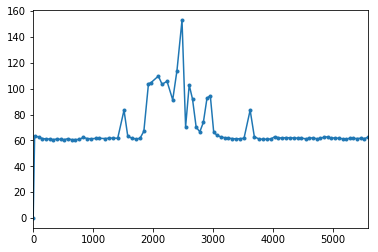

In [16]:

time_diff = uni_ds.diff(axis = 0, periods = 1)['elapsed_time']
time_diff[time_diff < 0] = 0

time_diff = time_diff.fillna(0)

print(time_diff.describe())

time_diff[:total_laps].plot(marker='.')

In [17]:
time_diff[:10]

0       0.0000
24     63.6534
95     62.4275
154    61.4383
213    61.0957
273    61.0421
335    60.6297
396    61.0644
456    60.7951
518    60.5765
Name: elapsed_time, dtype: float64

In [13]:
#time_diff[uni_ds['car_number'] == 12].plot(marker='.')

In [14]:
#uni_ds[uni_ds['car_number'] == 12]['rank'].plot(marker='.') 

In [15]:
# check the car with crash
#car13 = alldata[alldata['car_number']==13]
#car13

In [20]:
# make indy car completed_laps dataset
# car_number, completed_laps, rank, elapsed_time, rank_diff, elapsed_time_diff 
def make_cl_data(dataset):
    uni_ds = dataset.drop(["unique_id", "best_lap", "current_status", "track_status", "lap_status",
                      "laps_behind_leade","laps_behind_prec","overall_rank","pit_stop_count",
                      "last_pitted_lap","start_position","laps_led"], axis=1)
    uni_ds=uni_ds.sort_values(by=['car_number', 'completed_laps', 'elapsed_time'], ascending=True)
    uni_ds=uni_ds.drop_duplicates(subset=['car_number', 'completed_laps'], keep='first')
    
    carnumber = set(uni_ds['car_number'])
       
    
    # time diff
    time_diff = uni_ds.diff(axis = 0, periods = 1)['elapsed_time']
    time_diff[time_diff < 0] = 0
    time_diff = time_diff.fillna(0)

    print('cars:', carnumber)
   
    # faster solution , uni_ds already sorted by car_number and lap
    uni_ds['rank_diff'] = uni_ds['rank'].diff()
    mask = uni_ds.car_number != uni_ds.car_number.shift(1)
    uni_ds['rank_diff'][mask] = 0
    
    uni_ds['time_diff'] = uni_ds['elapsed_time'].diff()
    mask = uni_ds.car_number != uni_ds.car_number.shift(1)
    uni_ds['time_diff'][mask] = 0
    
    df = uni_ds[['car_number','completed_laps','rank','elapsed_time','rank_diff','time_diff']]
    
    return df


In [21]:
cldata = make_cl_data(dataset)
cldata.to_csv(outputprefix + 'completed_laps_diff.csv')

cars: {1, 98, 4, 5, 6, 9, 10, 14, 19, 20, 22, 23, 88, 26, 27}


/scratch/hpda/anaconda3/envs/predictor/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/scratch/hpda/anaconda3/envs/predictor/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [22]:
cldata = make_cl_data(alldata)
cldata.to_csv(outputprefix + 'all_completed_laps_diff.csv')

cars: {1, 4, 5, 6, 9, 10, 12, 14, 15, 18, 19, 20, 21, 22, 23, 26, 27, 28, 30, 32, 59, 88, 98}


/scratch/hpda/anaconda3/envs/predictor/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/scratch/hpda/anaconda3/envs/predictor/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [23]:
outputprefix

'2018-Toronto-'